## Identifying the co-ordinates to draw a bounding box on traffic signal lights

(480, 640, 3)


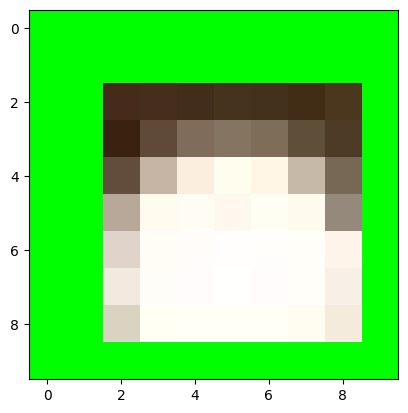

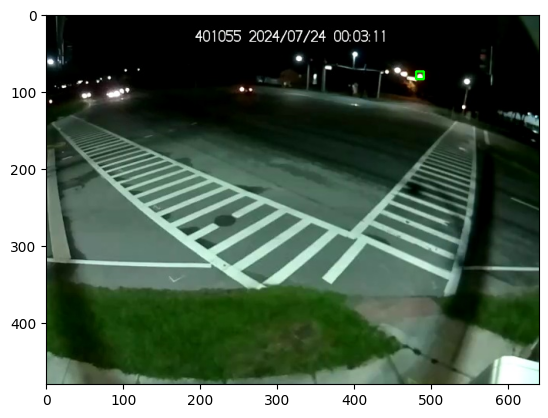

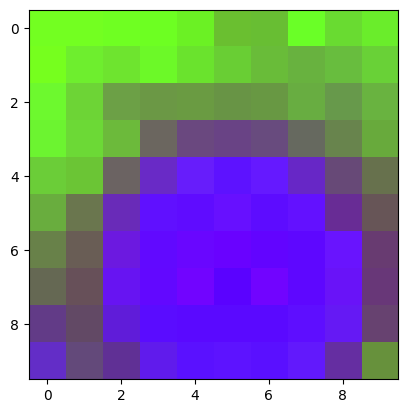

In [17]:
import cv2
from matplotlib import pyplot as plt

def draw_and_show_bounding_box(image_path, box_coordinates):
    # Load the image
    image = cv2.imread(image_path)
    print(image.shape)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB
    # hsv_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)
    # Draw the bounding box
    x, y, width, height = box_coordinates
    roi = image[y:y+height, x:x+width]
    hsv_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)
    cv2.rectangle(image, (x, y), (x + width, y + height), (0, 255, 0), 2)
    # Convert ROI from BGR to RGB (matplotlib displays in RGB)
    # roi_rgb = cv2.cvtColor(roi, cv2.COLOR_BGR2RGB)
    plt.imshow(roi)
    plt.axis('on')  # Hide the axis
    plt.show()
    # Use matplotlib to display the image
    plt.imshow(image)
    plt.show()
    plt.imshow(hsv_roi)
    plt.show()

# Usage
image_path = r"401055cam_1 00--03/frame_1887.jpg"
box_coordinates = (480, 74, 10, 10)
#box_coordinates = (1758, 148, 12, 12)
draw_and_show_bounding_box(image_path, box_coordinates)

## Testing the detected light is Yellow or not

In [18]:
#### Code for yellow Detection ########
import cv2
import numpy as np

def detect_yellow_light(image_path, box_coordinates):
    """
    Detects yellow light in a specified region of an image.

    Parameters:
    - image_path: str, path to the image file
    - box_coordinates: tuple, coordinates of the bounding box (x, y, width, height)
    """
    # Load the image
    image = cv2.imread(image_path)
    if image is None:
        print("Error: Image not found")
        return False

    # Extract the region of interest (ROI) defined by the bounding box
    x, y, width, height = box_coordinates
    roi = image[y:y+height, x:x+width]

    # Convert ROI from BGR to HSV color space
    hsv_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)

    # Define range of yellow color in HSV
    lower_yellow = np.array([25, 25, 100])  # Lower bound of yellow hue
    upper_yellow = np.array([30, 255, 255])  # Upper bound of yellow hue
    

    
    mask = cv2.inRange(hsv_roi, lower_yellow, upper_yellow) # Threshold the HSV image to get only yellow colors

    yellow_pixels = cv2.countNonZero(mask)  # Check the amount/percentage of yellow
    total_pixels = mask.size
    
    
    yellow_ratio = yellow_pixels / total_pixels # Finding the yellow ratio in bounding box
    #if yellow_ratio>0.2:
    print(yellow_ratio)

    # Optionally, display the mask image
    # cv2.imshow('Yellow Mask', mask)
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()

    return yellow_ratio > 0.01 # Returns True if more than 10% of the ROI is yellow


is_yellow = detect_yellow_light(image_path, box_coordinates)
print("Yellow light detected:", is_yellow)

0.0
Yellow light detected: False


## Generate Frames for the Stiched Video

In [248]:
import cv2
import os

def extract_frames(video_path, output_folder):
    # Create output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Open the video file
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print("Error: Could not open video file.")
        return

    frame_count = 0
    while True:
        # Read a frame from the video
        ret, frame = cap.read()
        if not ret:
            break

        frame_count+=1
        # Write the frame to the output folder
        frame_path = os.path.join(output_folder, f"frame_{frame_count}.jpg")
        cv2.imwrite(frame_path, frame)


    cap.release()
    print(f"Total frames extracted: {frame_count}")

# directory/path of the stiched video
video_path=r"C:\Users\vishw\Downloads\Yellow Light\6-7hr_output_of_3_videos.mp4"
output_folder='6-7hr_frames_stichedvideo'
extract_frames(video_path, output_folder)

KeyboardInterrupt: 

## Segregating the frames which has Yellow light

In [50]:
!pip install natsort

In [251]:
import natsort
import os

#By this time we need to have the stiched video frames generated and arranged in folder.

stiched_video_frames = r"C:\Users\vishw\Downloads\Yellow Light\6-7hr_frames_stichedvideo"

frames=os.listdir(stiched_video_frames)
frames=natsort.natsorted(frames,reverse=False)

yellow_active = False
yellow_periods = []
start_frame = None
end_frame = None

# Analyze each frame
for idx, frame_name in enumerate(frames):
    frame_path = os.path.join(stiched_video_frames, frame_name)
    frame = cv2.imread(frame_path)
    
    box_coordinates = box_coordinates  #change the box coordinate accordingly
    if detect_yellow_light(frame_path,box_coordinates):
        if not yellow_active:
            yellow_active = True
            start_frame = idx
            print('start_frame',start_frame)
    else:
        if yellow_active:
            yellow_active = False
            end_frame = idx
            print('end_frame',end_frame)
            yellow_periods.append((start_frame, end_frame))


print(yellow_periods)
# # Process final active period if it ends at the last frame
# if yellow_active:
#     yellow_periods.append((start_frame, len(frames) - 1))

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.006944444444444444
0.006944444444444444
0.006944444444444444
0.006944444444444444
0.006944444444444444
0.006944444444444444
0.006944444444444444
0.006944444444444444
0.006944444444444444
0.006944444444444444
0.006944444444444444
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.16666666666666666
start_frame 147
0.0763888888888889
0.0763888888888889
0.006944444444444444
end_frame 150
0.006944444444444444
0.006944444444444444
0.006944444444444444
0.006944444444444444
0.006944444444444444
0.055555555

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


0.006944444444444444
0.006944444444444444
0.006944444444444444
0.006944444444444444
0.006944444444444444
0.013888888888888888
start_frame 2206
0.013888888888888888
0.006944444444444444
end_frame 2208
0.006944444444444444
0.006944444444444444
0.006944444444444444
0.006944444444444444
0.006944444444444444
0.006944444444444444
0.006944444444444444
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.006944444444444444
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.006944444444444444
0.006944444444444444
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.013888888888888888
start_frame 2268
0.013888888888888888
0.013888888888888888
0.013888888888888888
0.013888888888888888
0.013888888888888888
0.013888888888888888
0.020833333333333332
0.020833333333333332
0.020833333333333332
0.020833333333333332
0.013888888888888888
0.0
end_frame 2280
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.

KeyboardInterrupt: 

In [252]:
print(yellow_periods)

[(147, 150), (156, 181), (183, 193), (480, 492), (594, 601), (602, 640), (720, 721), (722, 724), (1020, 1030), (1674, 1723), (1724, 1738), (1783, 1788), (1801, 1815), (1816, 1817), (1850, 1851), (1854, 1856), (1888, 1889), (1890, 1891), (1900, 1903), (2099, 2145), (2154, 2160), (2161, 2165), (2167, 2171), (2172, 2179), (2184, 2198), (2206, 2208), (2268, 2280)]


## Cliping the 20sec yellow light video

In [163]:
# Define video properties
frame_example = cv2.imread(r"C:\Users\vishw\Downloads\Yellow Light\Sample image for drawing bonding box on yellow light.jpg")
height, width, layers = frame_example.shape
video_codec = cv2.VideoWriter_fourcc(*'mp4v')  

video_idx = 0  # Index for naming video files

final_path='yellow_light_final_output_1'
path=r"C:\Users\vishw\Downloads\Yellow Light"
final_output_path=os.path.join(path,final_path)
os.makedirs(final_output_path, exist_ok='True')

# Extract frames based on detection periods and create video clips from yellow_periods list(start,end)
for start, end in yellow_periods:
    video_idx += 1
    video_path = os.path.join(final_output_path, f"yellow_light_clip_{video_idx+34}.mp4")
    video = cv2.VideoWriter(video_path, video_codec, 10.0, (width, height))

    for i in range(start - 80, end + 100):
        if 0 <= i < len(frames):
            frame_path = os.path.join(stiched_video_frames, frames[i])
            frame = cv2.imread(frame_path)
            if frame is not None:
                video.write(frame)

    video.release()

## Identifying cone in the image with the help of bounding box

(480, 1920, 3)


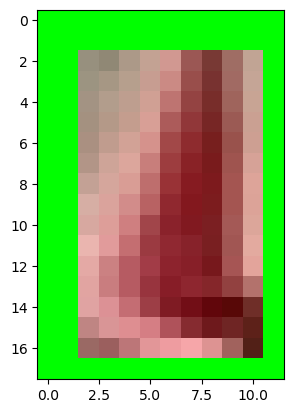

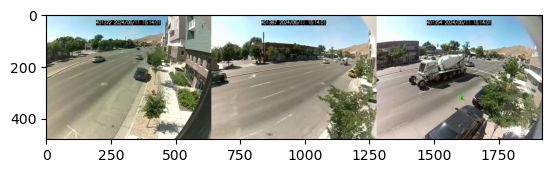

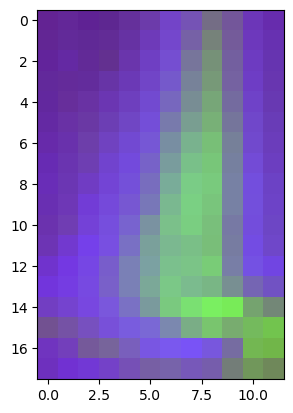

In [114]:
import cv2
from matplotlib import pyplot as plt

def draw_and_show_bounding_box(image_path, box_coordinates_cone):
    # Load the image
    image = cv2.imread(image_path)
    print(image.shape)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB
    # hsv_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)
    # Draw the bounding box
    x, y, width, height = box_coordinates_cone
    roi = image[y:y+height, x:x+width]
    hsv_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)
    cv2.rectangle(image, (x, y), (x + width, y + height), (0, 255, 0), 2)
    # Convert ROI from BGR to RGB (matplotlib displays in RGB)
    # roi_rgb = cv2.cvtColor(roi, cv2.COLOR_BGR2RGB)
    plt.imshow(roi)
    plt.axis('on')  # Hide the axis
    plt.show()
    # Use matplotlib to display the image
    plt.imshow(image)
    plt.show()
    plt.imshow(hsv_roi)
    plt.show()

# Usage
image_path = r"C:\Users\vishw\Downloads\Yellow Light\cone_frames_stichedvideo\frame_3600.jpg"
# box_coordinates = (565, 95, 10, 10)
box_coordinates_cone = (1602, 310, 12, 18)
draw_and_show_bounding_box(image_path, box_coordinates_cone)

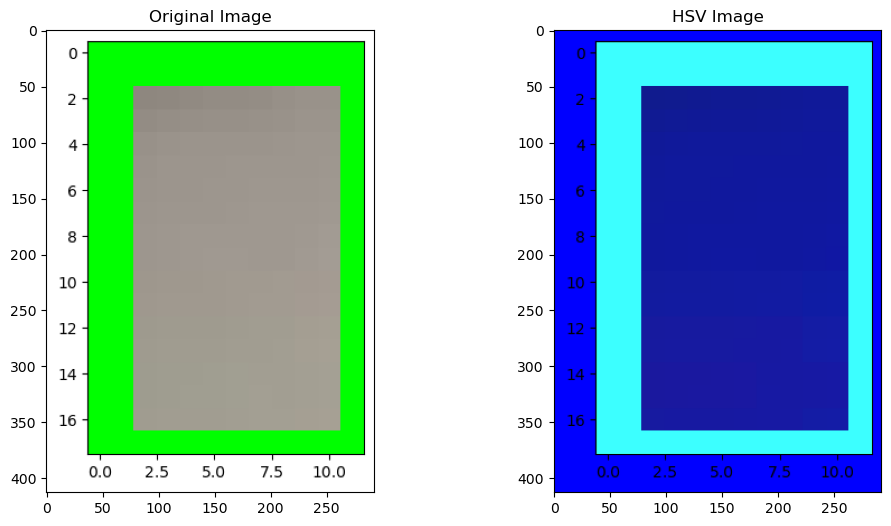

Lower_hsv_range:  [  2   0 151]
Upper_hsv_range:  [ 48 189 255]


In [76]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
cone_path = r"C:\Users\vishw\Downloads\Yellow Light\cone_image_not_detected.png"
image = cv2.imread(cone_path)

# Convert the image to HSV color space
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Display the original and HSV images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(hsv_image)
plt.title("HSV Image")

plt.show()

# Get the HSV values from the image
hsv_values = hsv_image.reshape((-1, 3))

# Calculate the mean and standard deviation of the HSV values
h_mean, s_mean, v_mean = np.mean(hsv_values, axis=0)
h_std, s_std, v_std = np.std(hsv_values, axis=0)

# Define the lower and upper HSV range
lower_hsv = np.array([h_mean - h_std, s_mean - s_std, v_mean - v_std]).astype(int)
upper_hsv = np.array([h_mean + h_std, s_mean + s_std, v_mean + v_std]).astype(int)

# Ensure the values are within the valid HSV range
lower_hsv = np.clip(lower_hsv, 0, 255)
upper_hsv = np.clip(upper_hsv, 0, 255)

print("Lower_hsv_range: ",lower_hsv)
print("Upper_hsv_range: ",upper_hsv)


In [105]:
#### Code for yellow Detection ########
import cv2
import numpy as np

def detect_cone_color(image_path, box_coordinates_cone):
    """
    Detects yellow light in a specified region of an image.

    Parameters:
    - image_path: str, path to the image file
    - box_coordinates: tuple, coordinates of the bounding box (x, y, width, height)
    """
    # Load the image
    image = cv2.imread(image_path)
    if image is None:
        print("Error: Image not found")
        return False

    # Extract the region of interest (ROI) defined by the bounding box
    x, y, width, height = box_coordinates_cone
    roi = image[y:y+height, x:x+width]

    # Convert ROI from BGR to HSV color space
    hsv_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)

    # Mention the ranges obtained from the above code
    lower_tomato = np.array([0, 65, 92])
    upper_tomato = np.array([254, 241, 224])  
    

    
    mask = cv2.inRange(hsv_roi, lower_tomato, upper_tomato) # Threshold the HSV image to get only red-orange colors

    tomato_pixels = cv2.countNonZero(mask)  # Check the amount/percentage of yellow
    total_pixels = mask.size
    
    
    red_orange_ratio = tomato_pixels / total_pixels# Finding the red-orange ratio in bounding box
    #print(red_orange_ratio)
    # Optionally, display the mask image
    # cv2.imshow('Yellow Mask', mask)
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()

    return red_orange_ratio > 0.0 # Returns True if more than 10% of the ROI is red-orange

image_path=r"C:\Users\vishw\Downloads\Yellow Light\cone_frames_for_84tf_cam\frame_583208.jpg"
is_cone = detect_cone_color(image_path, box_coordinates_cone)
print("Cone detected", is_cone)

Cone detected True


In [116]:
##### import natsort
import os

#By this time we need to have the stiched video frames generated and arranged in folder.

cone_frames = r"C:\Users\vishw\Downloads\Yellow Light\cone_frames_stichedvideo"

frames=os.listdir(cone_frames)
frames=natsort.natsorted(frames,reverse=False)

cone_active = False
cone_detection_periods = []
start_frame = None
end_frame = None

# Analyze each frame
for idx, frame_name in enumerate(frames):
    frame_path = os.path.join(cone_frames, frame_name)
    frame = cv2.imread(frame_path)
    
    box_coordinates_cone = box_coordinates_cone  #change the box coordinate accordingly
    if detect_cone_color(frame_path,box_coordinates_cone):
        if not cone_active:
            cone_active = True
            start_frame = idx+581000
            print("Start: ",frame_name)
    else:
        if cone_active:
            cone_active = False
            end_frame = idx+581000
            print("End: ",frame_name)
            #print(frame_name,'  ',end_frame)
            cone_detection_periods.append((start_frame, end_frame))


print(cone_detection_periods)

Start:  frame_864.jpg
End:  frame_876.jpg
Start:  frame_1166.jpg
End:  frame_1177.jpg
Start:  frame_1178.jpg
End:  frame_2404.jpg
Start:  frame_2407.jpg
End:  frame_4211.jpg
[(581863, 581875), (582165, 582176), (582177, 583403), (583406, 585210)]


In [118]:
# Define video properties
frame_example = cv2.imread(r"C:\Users\vishw\Downloads\Yellow Light\Sample image for drawing bonding box on yellow light.jpg")
height, width, layers = frame_example.shape
video_codec = cv2.VideoWriter_fourcc(*'mp4v')  

video_idx = 0  # Index for naming video files

final_path='calibration'
path=r"C:\Users\vishw\Downloads\Yellow Light"
final_output_path=os.path.join(path,final_path)
os.makedirs(final_output_path, exist_ok='True')

# Extract frames based on detection periods and create video clips from yellow_periods list(start,end)
cone_detection_periods=[(1166,4211)]
for start, end in cone_detection_periods:
    video_idx += 1
    video_path = os.path.join(final_output_path, f"calibration_clip_{video_idx}.mp4")
    video = cv2.VideoWriter(video_path, video_codec, 10.0, (width, height))

    for i in range(start - 120, end + 120):
        if 0 <= i < len(frames):
            frame_path = os.path.join(cone_frames, frames[i])
            frame = cv2.imread(frame_path)
            if frame is not None:
                video.write(frame)

    video.release()